In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

tf.random.set_seed(42)

In [2]:
data_by_month=pd.read_excel("DatabyMonth-135-8years.xlsx")

In [3]:
index=pd.date_range(start='2011',end='2019',freq='M',name='Date')

In [4]:
data_by_month.index=index

In [5]:
month=np.linspace(1,96,96).reshape(-1,1)

In [6]:
data_by_month['Month']=month.astype(float)

In [7]:
split_time=70
y_train=data_by_month['Truck'][:split_time].values
y_test=data_by_month['Truck'][split_time:].values
x_train=data_by_month['Month'][:split_time].values.reshape(-1,1)
x_test=data_by_month['Month'][split_time:].values.reshape(-1,1)

In [8]:
scalerx=StandardScaler().fit(x_train)
#scalery=StandardScaler().fit(y_train)

In [9]:
x_train=scalerx.transform(x_train.reshape(-1,1))
x_test=scalerx.transform(x_test.reshape(-1,1))

In [10]:
#y_train=scalery.transform(y_train.reshape(-1,1))
#y_test=scalery.transform(y_test.reshape(-1,1))

In [11]:
nn_model=Sequential()
nn_model.add(Dense(32,input_shape=(x_train.shape[1],)))
nn_model.add(Dense(16,activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss='mean_absolute_error')
nn_model.fit(x_train,y_train,epochs=250,validation_data=(x_test,y_test))

Epoch 1/250
3/3 [==============================] - 0s 50ms/step - loss: 32.4803 - val_loss: 23.2479
Epoch 2/250
3/3 [==============================] - 0s 8ms/step - loss: 32.0833 - val_loss: 22.6914
Epoch 3/250
3/3 [==============================] - 0s 8ms/step - loss: 31.7246 - val_loss: 21.9318
Epoch 4/250
3/3 [==============================] - 0s 9ms/step - loss: 31.2876 - val_loss: 21.0235
Epoch 5/250
3/3 [==============================] - 0s 9ms/step - loss: 30.7092 - val_loss: 19.9232
Epoch 6/250
3/3 [==============================] - 0s 9ms/step - loss: 29.9864 - val_loss: 18.5441
Epoch 7/250
3/3 [==============================] - 0s 9ms/step - loss: 29.0122 - val_loss: 16.7961
Epoch 8/250
3/3 [==============================] - 0s 9ms/step - loss: 27.8267 - val_loss: 14.6964
Epoch 9/250
3/3 [==============================] - 0s 9ms/step - loss: 26.2787 - val_loss: 12.3702
Epoch 10/250
3/3 [==============================] - 0s 9ms/step - loss: 24.4431 - val_loss: 9.7073
Epoch 11/

3/3 [==============================] - 0s 7ms/step - loss: 5.5033 - val_loss: 5.0412
Epoch 168/250
3/3 [==============================] - 0s 8ms/step - loss: 5.5070 - val_loss: 5.0856
Epoch 169/250
3/3 [==============================] - 0s 8ms/step - loss: 5.5067 - val_loss: 5.1264
Epoch 170/250
3/3 [==============================] - 0s 7ms/step - loss: 5.4997 - val_loss: 5.2560
Epoch 171/250
3/3 [==============================] - 0s 7ms/step - loss: 5.5552 - val_loss: 5.3274
Epoch 172/250
3/3 [==============================] - 0s 7ms/step - loss: 5.5564 - val_loss: 5.2622
Epoch 173/250
3/3 [==============================] - 0s 7ms/step - loss: 5.5813 - val_loss: 5.3162
Epoch 174/250
3/3 [==============================] - 0s 7ms/step - loss: 5.5799 - val_loss: 5.1936
Epoch 175/250
3/3 [==============================] - 0s 7ms/step - loss: 5.5466 - val_loss: 5.1069
Epoch 176/250
3/3 [==============================] - 0s 7ms/step - loss: 5.5300 - val_loss: 5.1148
Epoch 177/250
3/3 [=====

In [12]:
y_pred=nn_model.predict(x_test)
y_pred

array([[22.631586],
       [22.83141 ],
       [23.239372],
       [23.647337],
       [24.055296],
       [24.463259],
       [24.871222],
       [25.279182],
       [25.687145],
       [26.095106],
       [26.503065],
       [26.91103 ],
       [27.318996],
       [27.726955],
       [28.134914],
       [28.542881],
       [28.950838],
       [29.358803],
       [29.766764],
       [30.174726],
       [30.582685],
       [30.990646],
       [31.398619],
       [31.806572],
       [32.21453 ],
       [32.622498]], dtype=float32)

In [13]:
mean_absolute_error(y_test,y_pred)

5.489673467782827

In [14]:
y_pred_df=pd.DataFrame(y_pred)

In [15]:
y_pred_df.index=data_by_month.index[split_time:]

In [16]:
y_pred_df

,0
Date,
2016-11-30,22.631586
2016-12-31,22.831409
2017-01-31,23.239372
2017-02-28,23.647337
2017-03-31,24.055296
2017-04-30,24.463259
2017-05-31,24.871222
2017-06-30,25.279182
2017-07-31,25.687145


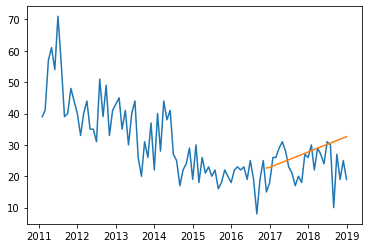

In [17]:
plt.plot(data_by_month['Truck'])
plt.plot(y_pred_df)